In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
twitter_ftx = pd.read_csv('/Users/namirsacic/tokenized-assets/ftx/ftx_TWTRUSD.csv')
twitter_ftx

,Unnamed: 0,id,price,size,side,liquidation,time
0,0,5244224493,54.060,5.95,buy,False,2022-10-28T12:46:59.447886+00:00
1,1,5244222873,54.060,0.85,buy,False,2022-10-28T12:46:46.075589+00:00
2,2,5244216295,54.060,1849.75,sell,False,2022-10-28T12:46:06.368775+00:00
3,3,5244216294,54.060,1849.75,sell,False,2022-10-28T12:46:06.368775+00:00
4,4,5244214856,54.100,5.45,sell,False,2022-10-28T12:45:52.291271+00:00
...,...,...,...,...,...,...,...
21509,1509,186129970,44.830,0.20,buy,False,2020-11-21T06:19:25.744132+00:00
21510,1510,184973713,43.750,0.30,sell,False,2020-11-20T13:58:45.421964+00:00
21511,1511,184736177,43.765,0.20,buy,False,2020-11-20T10:46:17.101057+00:00
21512,1512,184431261,43.585,0.25,buy,False,2020-11-20T07:06:42.951063+00:00


In [5]:
twitter_ftx['time'] = pd.to_datetime(twitter_ftx['time'], errors='coerce')
twitter_ftx['date'] = twitter_ftx['time'].dt.date
twitter_ftx_pro = pd.DataFrame(columns = ['Weighted Average Price'])
twitter_ftx_pro['Weighted Average Price'] = twitter_ftx.groupby('date').apply(lambda x: (x['price']*x['size']).sum() / x['size'].sum())
twitter_ftx_pro.rename({'date':'Date'}, inplace=True)
twitter_ftx_pro.reset_index()
twitter_ftx_pro['Absolute Volume'] = twitter_ftx.groupby('date').apply(lambda x: (x['price']*x['size']).sum())
twitter_ftx_pro

,Weighted Average Price,Absolute Volume
date,,
2020-11-20,43.655588,3.710725e+01
2020-11-21,44.798824,1.523160e+02
2020-11-23,44.400000,1.332000e+01
2020-11-24,45.350109,1.000423e+04
2020-11-25,46.425348,4.665748e+02
...,...,...
2022-10-24,51.412402,3.688326e+04
2022-10-25,53.157926,3.942032e+05
2022-10-26,53.540915,2.328521e+05


In [8]:
start_date = "2020-11-20"
end_date = "2022-10-28"

ticker = yf.Ticker("TWTR")
underlying_twitter = ticker.history(start=start_date, end=end_date, interval="1d", auto_adjust=True)
underlying_twitter

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-20 00:00:00-05:00,43.799999,45.320000,43.450001,44.680000,17050972,0,0
2020-11-23 00:00:00-05:00,44.900002,45.564999,44.180000,44.939999,10392108,0,0
2020-11-24 00:00:00-05:00,45.130001,45.439999,44.459999,45.230000,9053930,0,0
2020-11-25 00:00:00-05:00,44.970001,46.849998,44.849998,46.430000,15076622,0,0
2020-11-27 00:00:00-05:00,46.560001,47.005001,46.200001,46.590000,5133346,0,0
...,...,...,...,...,...,...,...
2022-10-21 00:00:00-04:00,50.000000,50.750000,49.549999,49.889999,51209029,0,0
2022-10-24 00:00:00-04:00,50.709999,51.860001,50.520000,51.520000,22987553,0,0
2022-10-25 00:00:00-04:00,52.415001,53.180000,52.200001,52.779999,35077848,0,0


In [9]:
underlying_twitter['OHLC Average'] = (underlying_twitter['Open'] + underlying_twitter['High'] + underlying_twitter['Low'] + underlying_twitter['Close'])/4

In [10]:
underlying_twitter['OHLC * Volume'] = underlying_twitter['Volume'] * underlying_twitter['OHLC Average']
underlying_twitter

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OHLC Average,OHLC * Volume
Date,,,,,,,,,
2020-11-20 00:00:00-05:00,43.799999,45.320000,43.450001,44.680000,17050972,0,0,44.312500,7.555712e+08
2020-11-23 00:00:00-05:00,44.900002,45.564999,44.180000,44.939999,10392108,0,0,44.896250,4.665667e+08
2020-11-24 00:00:00-05:00,45.130001,45.439999,44.459999,45.230000,9053930,0,0,45.065000,4.080154e+08
2020-11-25 00:00:00-05:00,44.970001,46.849998,44.849998,46.430000,15076622,0,0,45.775000,6.901324e+08
2020-11-27 00:00:00-05:00,46.560001,47.005001,46.200001,46.590000,5133346,0,0,46.588751,2.391562e+08
...,...,...,...,...,...,...,...,...,...
2022-10-21 00:00:00-04:00,50.000000,50.750000,49.549999,49.889999,51209029,0,0,50.047500,2.562884e+09
2022-10-24 00:00:00-04:00,50.709999,51.860001,50.520000,51.520000,22987553,0,0,51.152500,1.175871e+09
2022-10-25 00:00:00-04:00,52.415001,53.180000,52.200001,52.779999,35077848,0,0,52.643750,1.846629e+09


In [11]:
underlying_twitter['OHLC * Volume'][0]

755571196.75

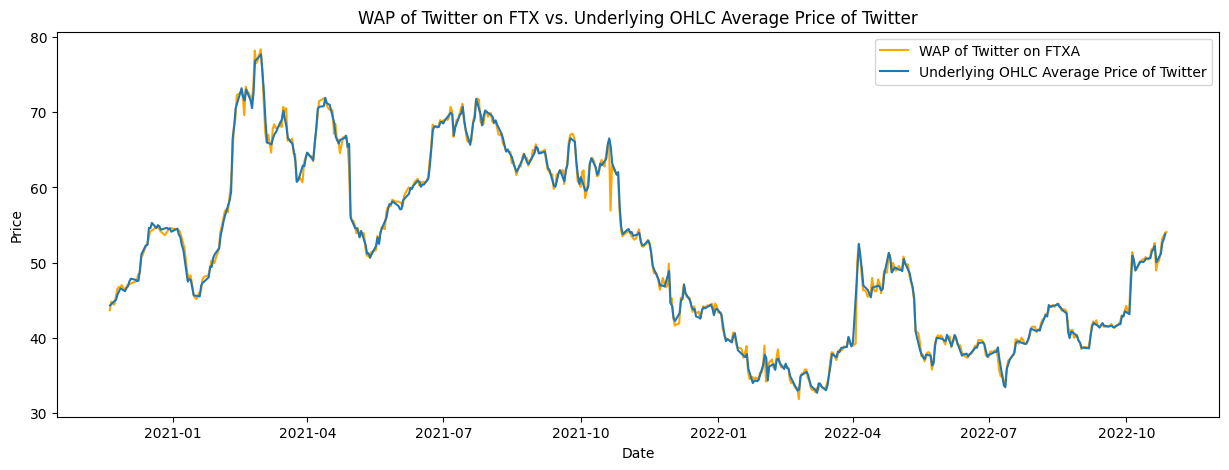

In [12]:
plt.figure(figsize=(15, 5))

# plot the lines
plt.plot(twitter_ftx_pro['Weighted Average Price'], label='WAP of Twitter on FTXA', color='orange')
plt.plot(underlying_twitter['OHLC Average'], label='Underlying OHLC Average Price of Twitter')

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('WAP of Twitter on FTX vs. Underlying OHLC Average Price of Twitter')

# add legend
plt.legend()

# display the plot
plt.show()

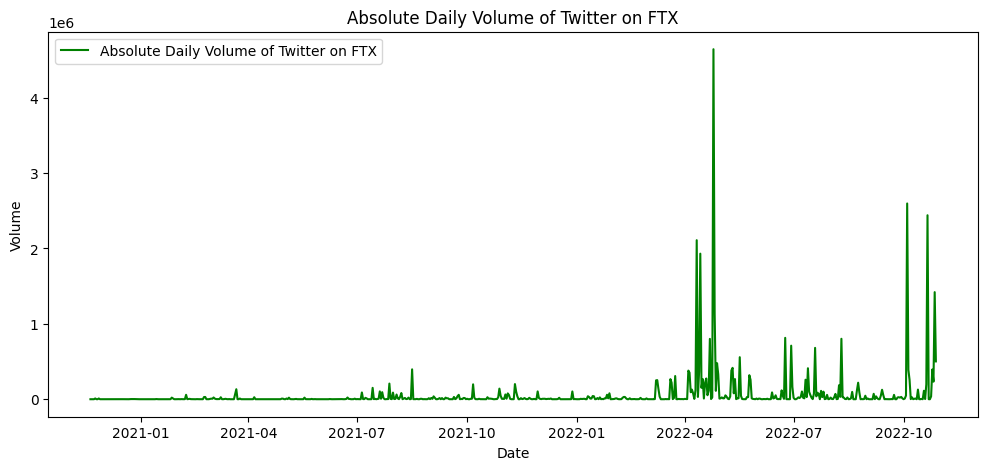

In [13]:
plt.figure(figsize=(12, 5))

# plot the lines
plt.plot(twitter_ftx_pro['Absolute Volume'], label='Absolute Daily Volume of Twitter on FTX', color='green')

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Absolute Daily Volume of Twitter on FTX')

# add legend
plt.legend()

# display the plot
plt.show()

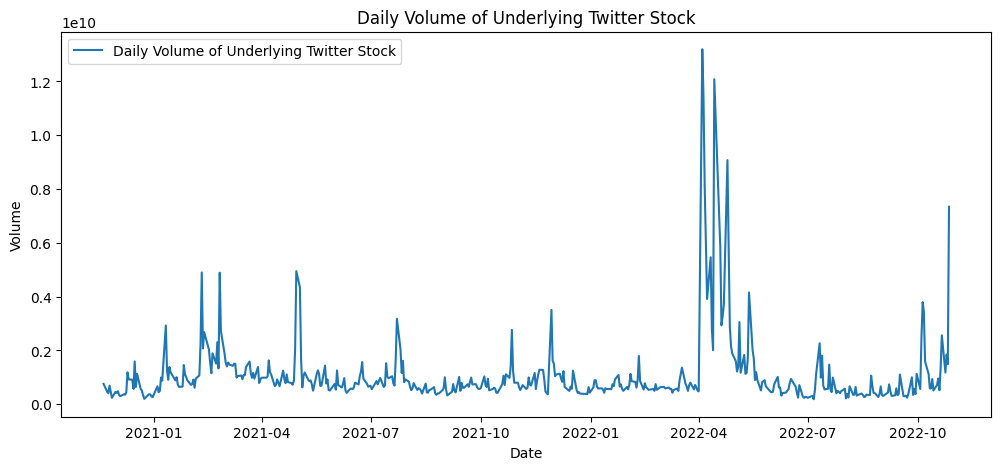

In [14]:
plt.figure(figsize=(12, 5))

# plot the lines
plt.plot(underlying_twitter['OHLC * Volume'], label='Daily Volume of Underlying Twitter Stock')

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Daily Volume of Underlying Twitter Stock')

# add legend
plt.legend()

# display the plot
plt.show()

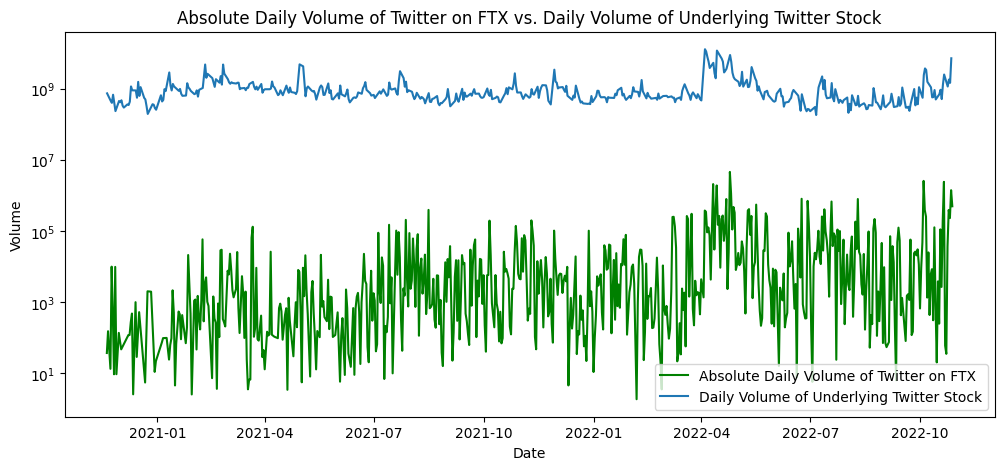

In [27]:
plt.figure(figsize=(12, 5))

# plot the lines
plt.plot(twitter_ftx_pro['Absolute Volume'], label='Absolute Daily Volume of Twitter on FTX', color='green')
plt.plot(underlying_twitter['OHLC * Volume'], label='Daily Volume of Underlying Twitter Stock')

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.yscale("log")
plt.title('Absolute Daily Volume of Twitter on FTX vs. Daily Volume of Underlying Twitter Stock')
# plt.yscale('log')

# add legend
plt.legend()

# display the plot
plt.show()

In [18]:
# import twitter intraday data
twitter_intra = pd.read_csv('/Users/namirsacic/tokenized-assets/intraday/TWTR_US_data.csv')
print(twitter_intra['datetime'].min())
print(twitter_intra['datetime'].max())
#twitter_intra = twitter_intra.loc[(twitter_intra['datetime'] >= '2020-11-20') & (twitter_intra['datetime'] <= '2022-10-28')]
twitter_intra

2019-12-31 23:12:00
2022-10-27 23:59:00


,datetime,open,high,low,close,volume
0,2019-12-31 23:12:00,32.03,32.03,32.03,32.03,500.0
1,2019-12-31 23:13:00,32.02,32.02,32.02,32.02,2300.0
2,2019-12-31 23:14:00,32.01,32.01,32.01,32.01,200.0
3,2019-12-31 23:20:00,32.01,32.01,32.01,32.01,200.0
4,2020-01-01 00:17:00,32.01,32.01,32.01,32.01,200.0
...,...,...,...,...,...,...
392589,2022-10-27 23:55:00,53.86,53.86,53.85,53.85,3416.0
392590,2022-10-27 23:56:00,53.85,53.86,53.85,53.86,7746.0
392591,2022-10-27 23:57:00,53.86,53.86,53.85,53.86,1254.0
392592,2022-10-27 23:58:00,53.85,53.86,53.85,53.86,5111.0


In [19]:
# import twitter FTX
twitter_ftx = pd.read_csv('/Users/namirsacic/tokenized-assets/ftx/ftx_TWTRUSD.csv')
print(twitter_ftx['time'].min())
print(twitter_ftx['time'].max())
#twitter_ftx = twitter_ftx.loc[(twitter_ftx['time'] >= '2020-11-20') & (twitter_ftx['time'] <= '2022-10-28')]
twitter_ftx

2020-11-20T05:26:16.159905+00:00
2022-10-28T12:46:59.447886+00:00


,Unnamed: 0,id,price,size,side,liquidation,time
0,0,5244224493,54.060,5.95,buy,False,2022-10-28T12:46:59.447886+00:00
1,1,5244222873,54.060,0.85,buy,False,2022-10-28T12:46:46.075589+00:00
2,2,5244216295,54.060,1849.75,sell,False,2022-10-28T12:46:06.368775+00:00
3,3,5244216294,54.060,1849.75,sell,False,2022-10-28T12:46:06.368775+00:00
4,4,5244214856,54.100,5.45,sell,False,2022-10-28T12:45:52.291271+00:00
...,...,...,...,...,...,...,...
21509,1509,186129970,44.830,0.20,buy,False,2020-11-21T06:19:25.744132+00:00
21510,1510,184973713,43.750,0.30,sell,False,2020-11-20T13:58:45.421964+00:00
21511,1511,184736177,43.765,0.20,buy,False,2020-11-20T10:46:17.101057+00:00
21512,1512,184431261,43.585,0.25,buy,False,2020-11-20T07:06:42.951063+00:00


In [22]:

twitter = pd.read_csv('/Users/namirsacic/tokenized-assets/data_analysis/processed_data/merged_data/TWTR_merged.csv')


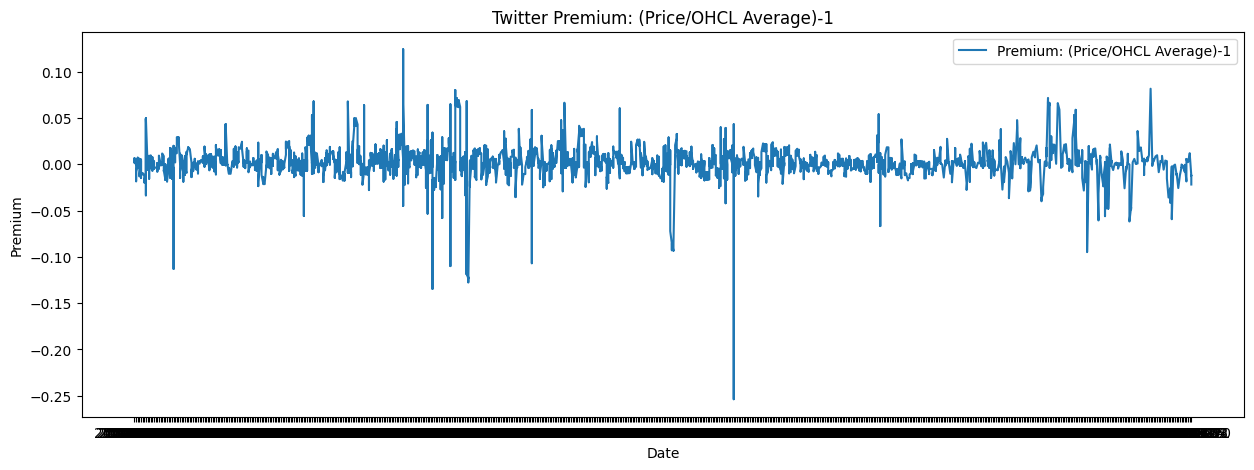

In [23]:
plt.figure(figsize=(15, 5))

# plot the lines
plt.plot(twitter['day'], twitter['premium'], label='Premium: (Price/OHCL Average)-1')

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Premium')
plt.title('Twitter Premium: (Price/OHCL Average)-1')
plt.legend()
plt.show()

In [24]:
twitter['day'] = pd.to_datetime(twitter['day'])
premium_by_date = twitter.groupby('day')['premium'].mean()
premium_by_date = premium_by_date.to_frame()
premium_by_date.reset_index()

,day,premium
0,2020-11-20,-0.015521
1,2020-11-21,0.011777
2,2020-11-23,0.002370
3,2020-11-24,0.004976
4,2020-11-25,-0.001761
...,...,...
645,2022-10-24,-0.000772
646,2022-10-25,0.001172
647,2022-10-26,-0.000002
648,2022-10-27,0.000645


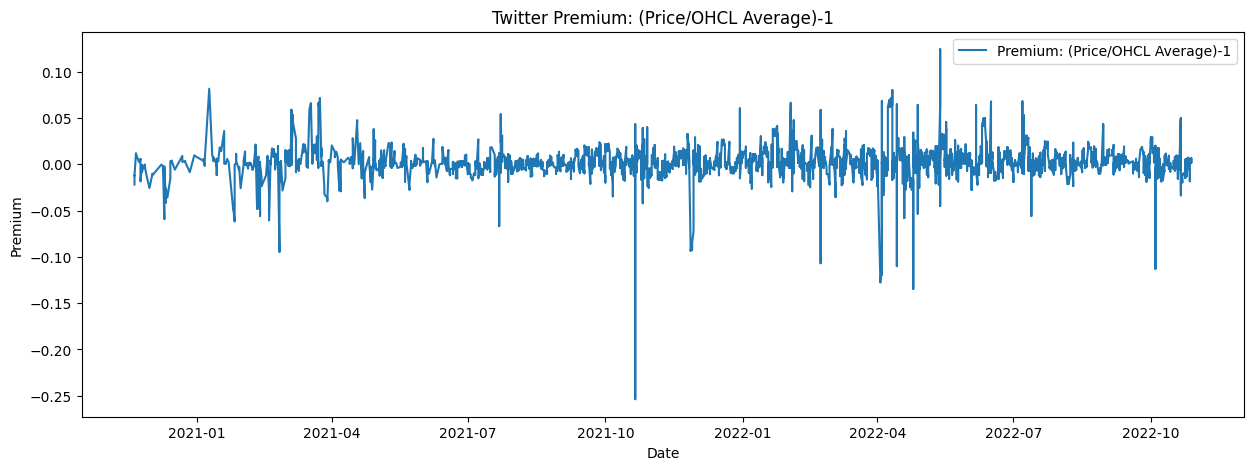

In [25]:
plt.figure(figsize=(15, 5))

# plot the lines
plt.plot(twitter['day'], twitter['premium'], label='Premium: (Price/OHCL Average)-1')

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Premium')
plt.title('Twitter Premium: (Price/OHCL Average)-1')
plt.legend()
plt.show()